<a href="https://colab.research.google.com/github/Jayavathsan/DeepLearning/blob/main/PyTorch/AutoEncoders/denoisingMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Denoising MNIST

In [ ]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [13]:
%matplotlib notebook

In [14]:
%matplotlib inline

# Import and process the data

In [15]:
# import dataset
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

# don't need labels!
data = data[:,1:]

# normalize the data to a range of [0 1]
normalizedData = data / np.max(data)

# convert to tensor
tensorData = torch.tensor(normalizedData).float()

# Create the DL model

In [16]:
def createAutoEncoder():

  class autoEncoderNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,250)

      ### encoder layer
      self.encode = nn.Linear(250,50)

      ### latent layer
      self.latent = nn.Linear(50,250)

      ### decoder layer
      self.dec = nn.Linear(250,784)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.encode(x) )
      x = F.relu( self.latent(x) )
      y = torch.sigmoid( self.dec(x) )
      return y

  # create the model instance
  net = autoEncoderNet()

  # loss function
  lossFunction = nn.MSELoss()

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(),lr=.001)

  return net,lossFunction,optimizer

In [17]:
# test the model with a bit of data
net,lossFunction,optimizer = createAutoEncoder()

x = tensorData[:5,:]
yHat = net(x)

print(x.shape)
print(yHat.shape)

torch.Size([5, 784])
torch.Size([5, 784])


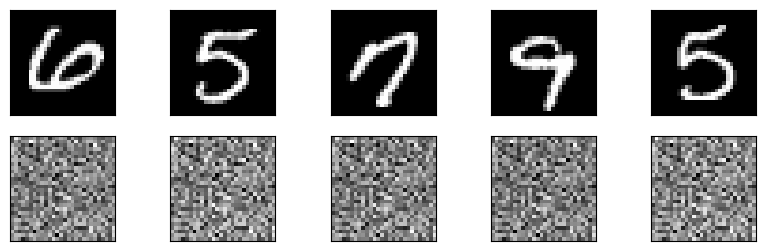

In [18]:
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(x[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])

plt.show()

# Create a function that trains the model

In [19]:
def trainModel():

  # number of epochs
  numepochs = 10000

  # create a new model
  net,lossFunction,optimizer = createAutoEncoder()

  # initialize losses
  losses = torch.zeros(numepochs)


  # loop over epochs
  for i in range(numepochs):

    # select a random set of images
    randomidx = np.random.choice(tensorData.shape[0],size=32)
    x = tensorData[randomidx,:]

    # forward pass and loss
    yHat = net(x)
    loss = lossFunction(yHat,x)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # losses in this epoch
    losses[i] = loss.item()
  # end epochs

  # function output
  return losses,net

# Run the model and show the results!

Final loss: 0.0067


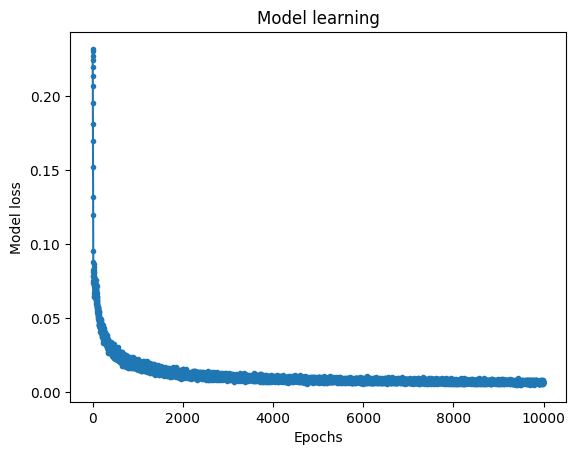

In [20]:
# train the model
losses,net = trainModel()
print(f'Final loss: {losses[-1]:.4f}')

# visualize the losses
plt.plot(losses,'.-')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.title('Model learning')
plt.show()

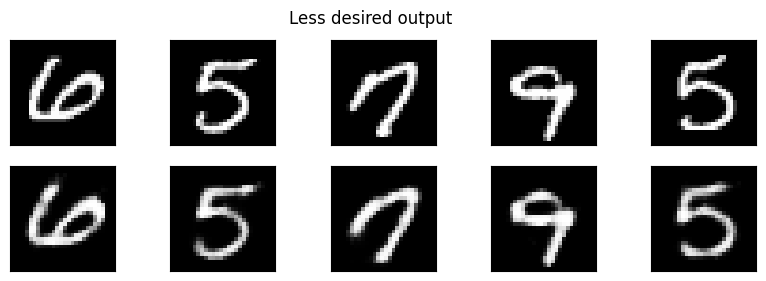

In [21]:
# Repeat the visualization when testing the model
x = tensorData[:5,:]
yHat = net(x)


# Model performance
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(x[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])

plt.suptitle('Less desired output')
plt.show()

# Add noise to see a use case of an autoencoder

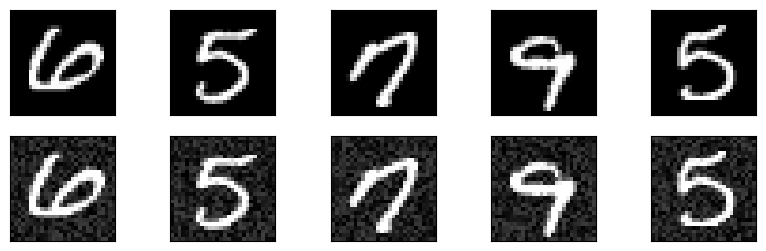

In [22]:
# grab a small set of images
x = tensorData[:10,:]

# add noise
xNoise = x + torch.rand_like(x)/4

# clip at 1
xNoise[xNoise>1] = 1


# show the noisy images
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(x[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(xNoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])

plt.show()

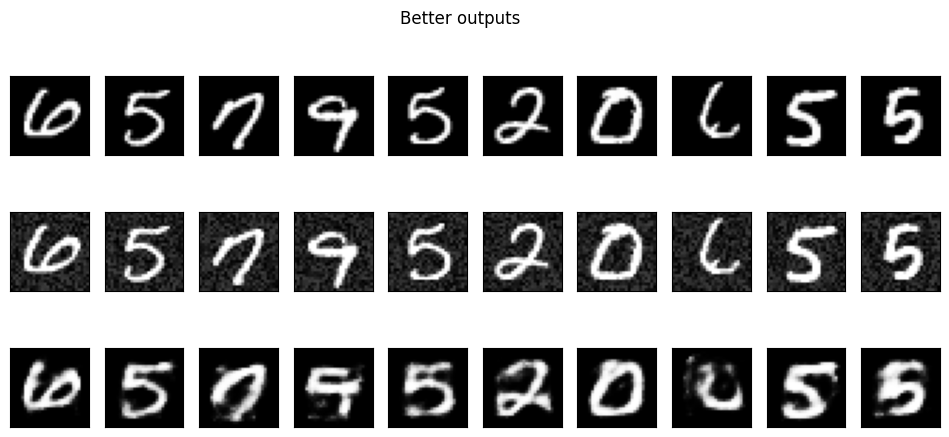

In [23]:
# run through the model
y = net(xNoise)


# show the noisy images
fig,axs = plt.subplots(3,10,figsize=(12,5))

for i in range(10):
  axs[0,i].imshow(x[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(xNoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[2,i].imshow(y[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  axs[2,i].set_xticks([]), axs[2,i].set_yticks([])

plt.suptitle('Better outputs')
plt.show()